17 , 1.1372028161448179e-129 , 30000


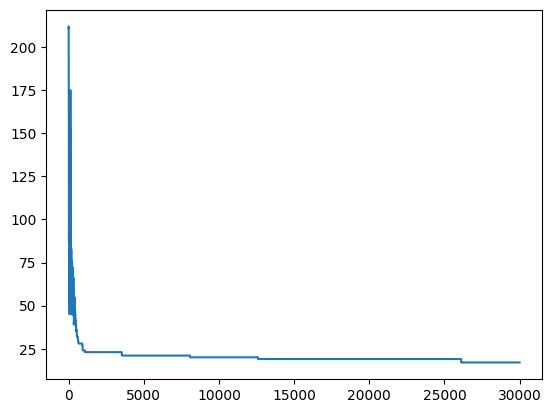

17  128.3036991 75 0


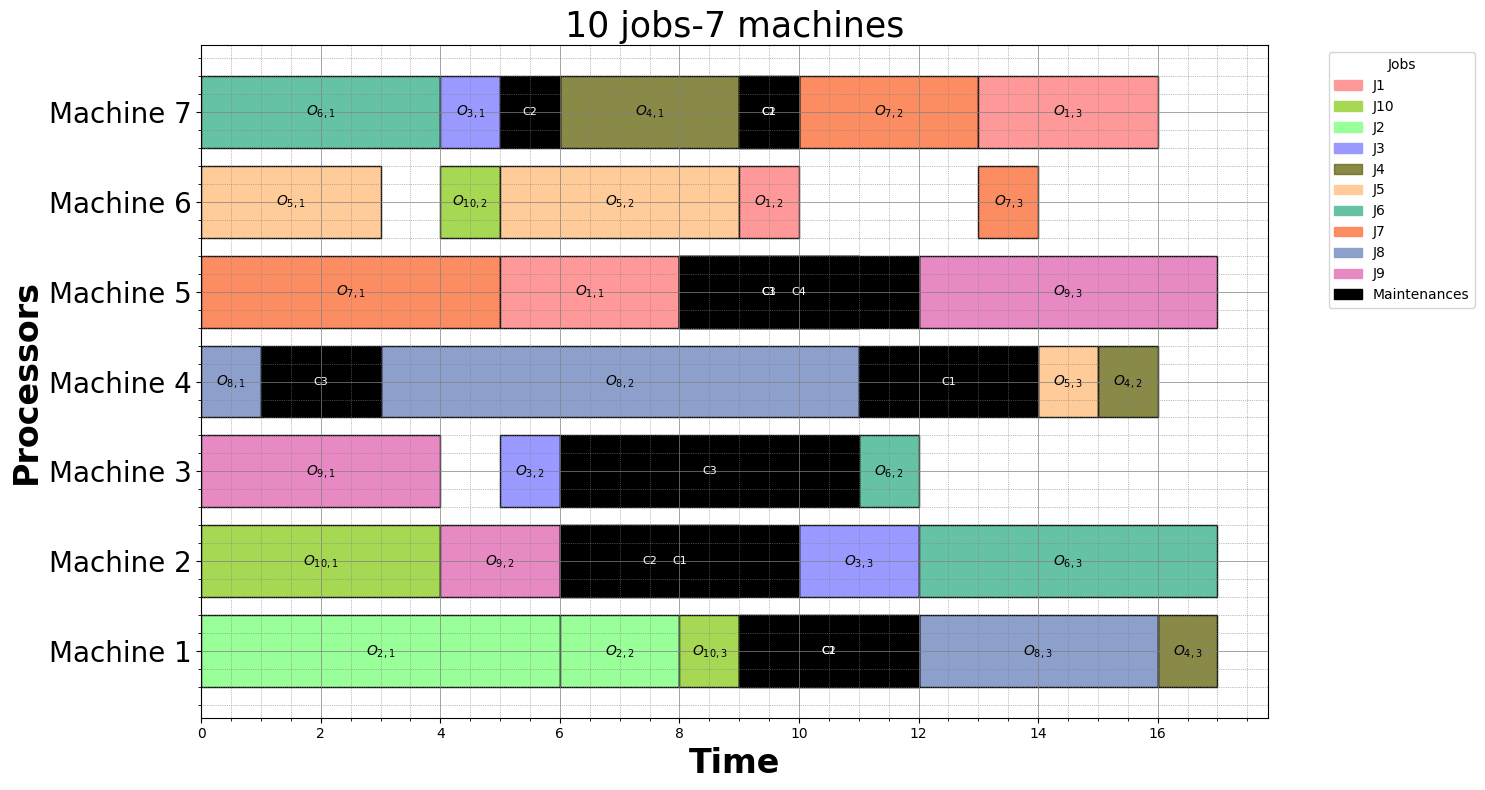

17.0 75 0.9798 0


In [1]:
from RecuitSimuleCS import *
from fonctions.data import Data
from fonctions.CommonFunctions import *

import random
import math
import matplotlib.pyplot as plt
from PIL import Image
import time 
from fonctions.diagram import *
from fonctions.Save_Read_JSON import *
import json

lambdaPM = [0.8]
mu = [0]
PM_time = [0]

nbJobs, nbMachines, nbOperationsParJob, dureeOperations, processingTimes = parse_operations_file(f"TESTS/k2/k2.txt")
_, _, nbComposants, seuils_degradation, dureeMaintenances, degradations, degradations2 = parse_degradations_file(f"TESTS/k2/instance01/instance.txt")


data = Data(nbJobs, nbMachines, nbComposants, seuils_degradation, dureeMaintenances, degradations, degradations2, nbOperationsParJob, dureeOperations, processingTimes)

#data.dureeMaintenances=[[0 for _,l in enumerate(L)] for _,L in enumerate(data.dureeMaintenances) ]
data.alpha_kl = [[0.001 for l in range(data.nbComposants[k])] for k in range(data.nbMachines)]
data.Qjmin = [0.95 for j in range(data.nbJobs)]


#print(repr(data))

tempInit=100
tempFin=0
coolRate=0.99
iters=30000
objweights=[1.0,0.0,0.0]
rscs=RSCS(data)
best_solution, best_energy, total_execution_time,nbrmaint,avgoutqual,qualpenal = rscs.Run_RSCS(tempInit,tempFin,coolRate,iters,objweights,True)
save_JSON(data,best_solution,"testk2_inst1.json",objweights)
print(f"{best_energy}  {total_execution_time} {nbrmaint} {qualpenal}")

#result = lire_fichier_json(f"testk2_inst1.json")
with open(f"testk2_inst1.json", 'r') as fichier:
        result = json.load(fichier)
plotGantt(result, "testk2_inst1_figure",f"{nbJobs} jobs-{nbMachines} machines", showgantt=True)

t_ij, c_ij, Cmax, D_kl, y, i_s, Qj, cout,nbMaintenance,outqual,penality=completionTime(data, best_solution,objweights)
print(cout,nbMaintenance,outqual,penality)

In [2]:
print("\nDetailed representation (__repr__):")
print(repr(data))
print(data.dureeMaintenances[0][1])


Detailed representation (__repr__):
Data(nbJobs=10, nbMachines=7) 

Machine   Number of Components     Degradation Thresholds   Maintenance duration     
--------------------------------------------------------------------------------
M1        2                        [9, 10]                  [3, 3]                   
M2        2                        [10, 6]                  [4, 3]                   
M3        3                        [7, 12, 5]               [3, 5, 5]                
M4        3                        [11, 9, 6]               [3, 3, 2]                
M5        4                        [5, 10, 7, 5]            [3, 4, 3, 4]             
M6        1                        [11]                     [4]                      
M7        2                        [11, 7]                  [1, 1]                   


Job       Operation (Machine, Duration)(Component degradation)  
----------------------------------------
J1          Op 1     M1        1       (C1,9) (C2,7) 
